In [31]:
import pandas as pd 
import numpy as np
from pandas import DataFrame,Series

In [32]:
path_name="./titanic-data.csv"
titantic_data = pd.read_csv(path_name)
df_titantic=DataFrame(titantic_data)

In [33]:
#筛选出生还和未生还的数据
survived=df_titantic[df_titantic['Survived']==1]
unsurvived=df_titantic[df_titantic['Survived']==0]

In [34]:
#查看每一列的数目，确定数据是否准确
print 'Survived number of index:'
print survived.count()
print 'Unsurvived number of index'
print unsurvived.count()

Survived number of index:
PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64
Unsurvived number of index
PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
dtype: int64


In [35]:
#通过以上代码显示index数量，发现age和cabin数量与乘客数不匹配，进一步清洗age异常数据
survived=survived[survived['Age']>0]
unsurvived=unsurvived[unsurvived['Age']>0]
#筛选出生还者pclass,sex，ages数据
p_class_survived=survived['Pclass']
sex_survived=survived['Sex']
age_survived=survived['Age']
#筛选出遇难者pclass,sex，ages数据
p_class_unsurvived=unsurvived['Pclass']
sex_unsurvived=unsurvived['Sex']
age_unsurvived=unsurvived['Age']

In [36]:
#创建绘制图形函数
% pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
def data_vis(df, xlabel, ylabel, title,position):
    """
    Des : 
      - a simple wrap of plt and seabron, to plot a barchart in jupyter-notebook
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    df.value_counts(sort=False).plot(kind=position)
    sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


Pclass相关数据
1    186
2    173
3    355
Name: Pclass, dtype: int64


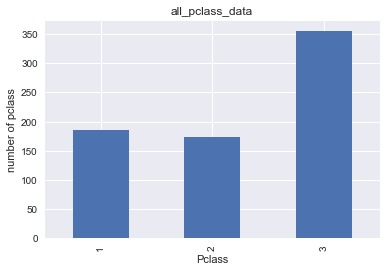

In [37]:
#分析整体函数
df_t=df_titantic[df_titantic['Age']>0]
print 'Pclass相关数据'
data_vis(df_t['Pclass'],'Pclass','number of pclass','all_pclass_data','bar')
print df_t['Pclass'].value_counts(sort=False)#算出每类船票人数


整体Sex相关数据
female    261
male      453
Name: Sex, dtype: int64


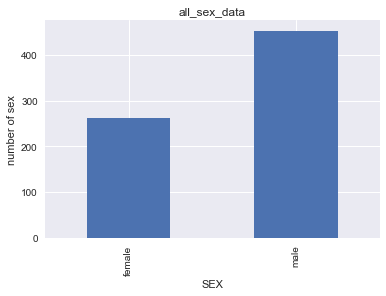

In [38]:
print '整体Sex相关数据'
data_vis(df_t['Sex'],'SEX','number of sex','all_sex_data','bar')
print df_t['Sex'].value_counts(sort=False)

整体Age相关数据


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

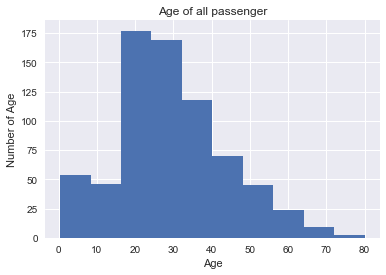

In [39]:
print '整体Age相关数据'
plt.xlabel('Age')
plt.ylabel('Number of Age')
plt.title('Age of all passenger')
plt.hist(df_t['Age'], bins=10)
df_t['Age'].describe()

1    122
2     83
3     85
Name: Pclass, dtype: int64


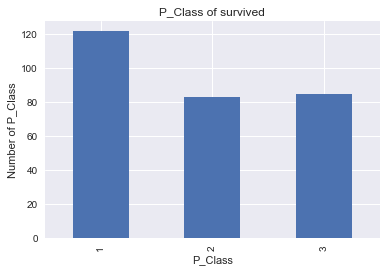

In [40]:
#绘制图形  按照票等级排序的条形图
data_vis(p_class_survived,'P_Class', 'Number of P_Class', 'P_Class of survived','bar')
print survived['Pclass'].value_counts(sort=False)

female    197
male       93
Name: Sex, dtype: int64


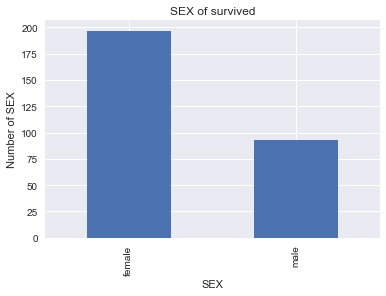

In [41]:
#性别分类条形
data_vis(sex_survived,'SEX', 'Number of SEX', 'SEX of survived','bar')
print survived['Sex'].value_counts(sort=False)

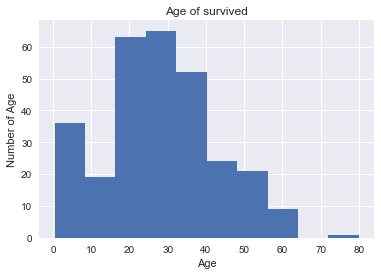

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [42]:
#绘制年龄生还人数的直方图
plt.xlabel('Age')
plt.ylabel('Number of Age')
plt.title('Age of survived')
plt.hist(age_survived, bins=10)
plt.show()
sns.set(color_codes=True)
age_survived.describe()

1     64
2     90
3    270
Name: Pclass, dtype: int64


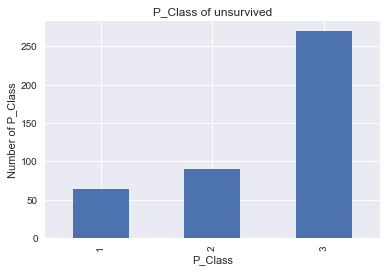

In [43]:
#绘制票等级遇难人数的条形图
data_vis(p_class_unsurvived,'P_Class', 'Number of P_Class', 'P_Class of unsurvived','bar')
print unsurvived['Pclass'].value_counts(sort=False)


female     64
male      360
Name: Sex, dtype: int64


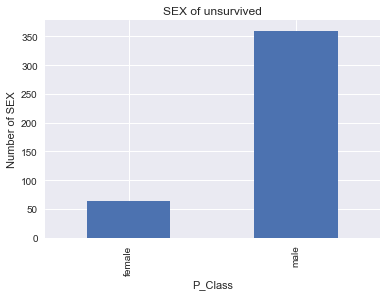

In [44]:
#绘制遇难人数按性别分类条形图
data_vis(sex_unsurvived,'P_Class', 'Number of SEX', 'SEX of unsurvived','bar')
print unsurvived['Sex'].value_counts(sort=False)

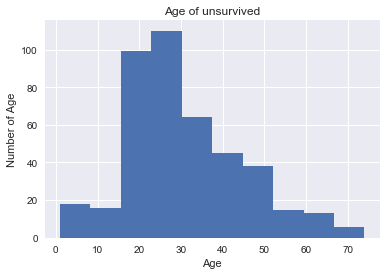

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [45]:
#绘制遇难人数按年龄分类的直方图
plt.xlabel('Age')
plt.ylabel('Number of Age')
plt.title('Age of unsurvived')
plt.hist(age_unsurvived, bins=10)
plt.show()
sns.set(color_codes=True)
age_unsurvived.describe()

In [46]:
#根据图表，发现age图表数据异常，20-30左右生还和遇难的比例都较高，断定造成是由于这个年龄段乘船人数较多

In [47]:
#将age进行分组
def div_age(group_data):
    if group_data<10:
        group_data='0-10'
    elif group_data<20:
        group_data='10-20'
    elif group_data<30:
        group_data='20-30'
    elif group_data<40:
        group_data='30-40'
    elif group_data<50:
        group_data='40-50'
    elif group_data<60:
        group_data='50-60'
    elif group_data<70:
        group_data='60-70'
    else:
        group_data='70-80'
    return group_data

In [48]:
 #将所有人年龄分组
div_sur_age=survived['Age'].apply(div_age)
div_unsur_age=unsurvived['Age'].apply(div_age)
div_all_age=df_t['Age'].apply(div_age)  

In [49]:
#计算出各个组存活的概率
rate_of_survived=div_sur_age.value_counts(sort=False)/div_all_age.value_counts(sort=False)
rate_of_survived=DataFrame(rate_of_survived)
print rate_of_survived

            Age
0-10   0.612903
10-20  0.401961
20-30  0.350000
30-40  0.437126
40-50  0.382022
50-60  0.416667
60-70  0.315789
70-80  0.142857


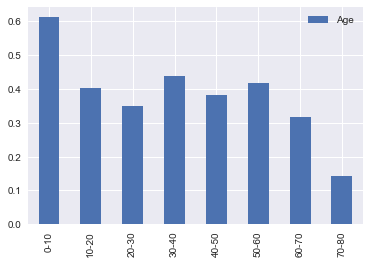

In [50]:
#绘制生还概率条形图
rate_of_survived.plot(kind='bar')

In [51]:
#由于各年龄段人数差异较大，可能造成年龄对生还率造成的影响不准确，进一步分析年龄与pclass是否存在一定联系，进而影响生还率

In [53]:
#关于年龄与pclass关系的分析
df_p_age= df_t.groupby('Pclass')['Age']
df_p_age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [54]:
#定义绘制年龄分布图函数
def freq_age(data,xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.hist(data['Age'], bins=10)

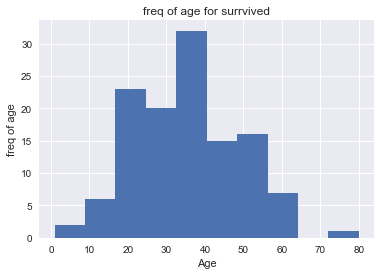

In [35]:
#分析生还者中1等仓年龄分布
sur_age_p1=survived[survived['Pclass']==1]
freq_age(sur_age_p1,'Age','freq of age','freq of age for surrvived')